In [ ]:
import pydicom
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import os
import shutil
import time

Mendeley Data

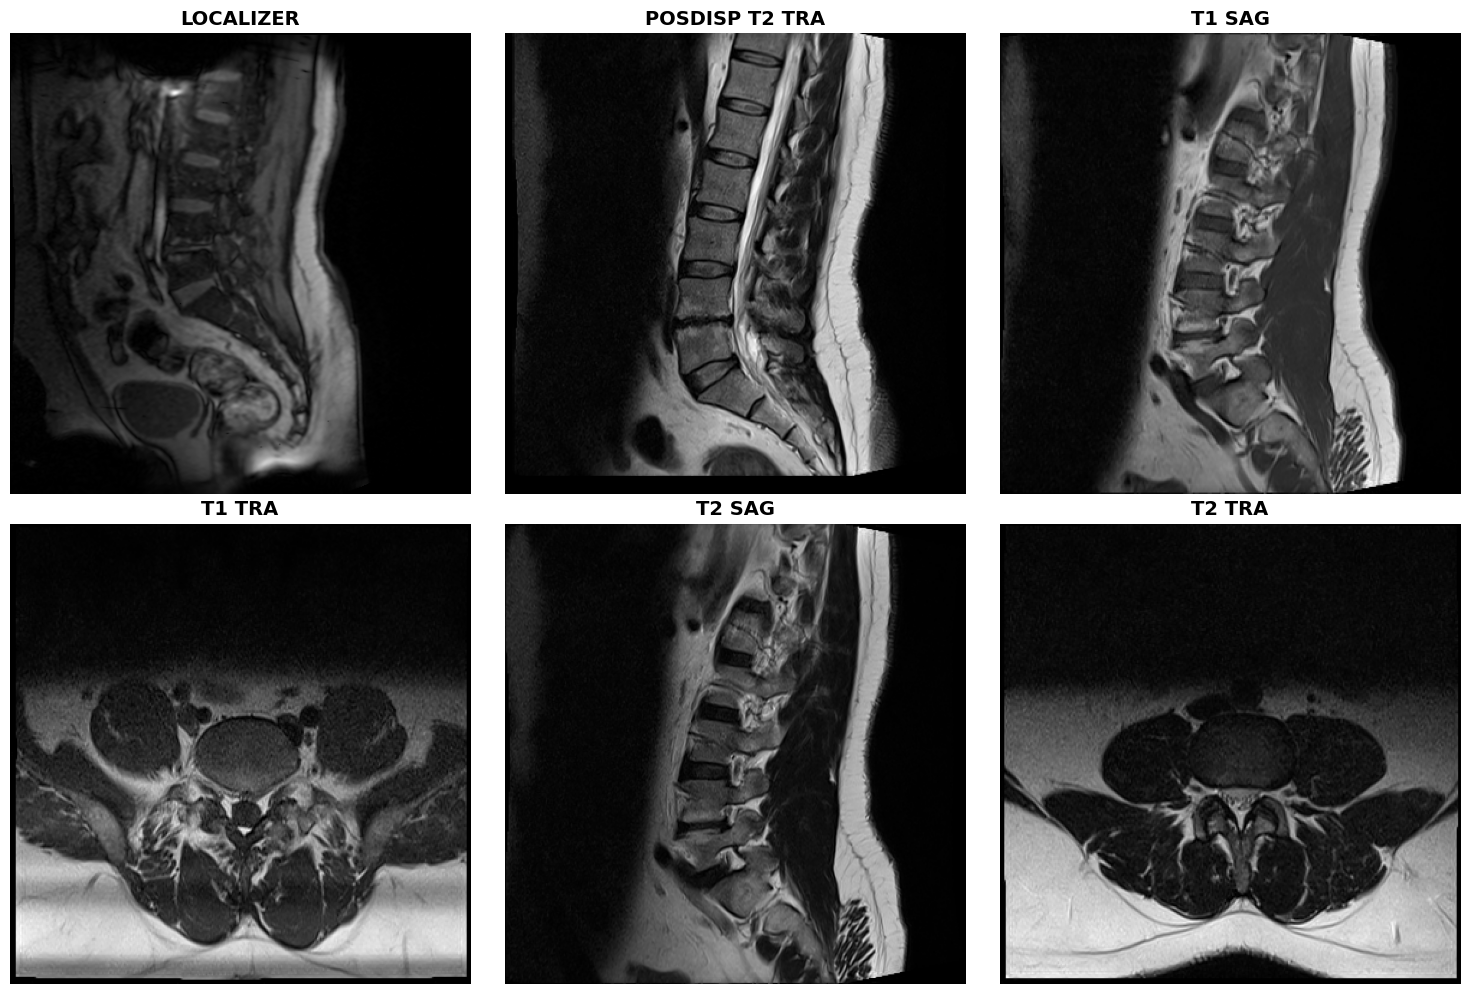

In [52]:
paths = [
    "Mendeley/0001/L-SPINE_LSS_20160309_091629_240000/LOCALIZER_0001/LOCALIZER_0_0001_002.ima",
    "Mendeley/0001/L-SPINE_LSS_20160309_091629_240000/POSDISP_[4]_T2_TSE_TRA_384_5001/POSDISP_[4]_0001_002.ima",
    "Mendeley/0001/L-SPINE_LSS_20160309_091629_240000/T1_TSE_SAG_320_0003/T1_TSE_SAG__0001_012.ima",
    "Mendeley/0001/L-SPINE_LSS_20160309_091629_240000/T1_TSE_TRA_0005/T1_TSE_TRA__0001_009.ima",
    "Mendeley/0001/L-SPINE_LSS_20160309_091629_240000/T2_TSE_SAG_384_0002/T2_TSE_SAG__0001_012.ima",
    "Mendeley/0001/L-SPINE_LSS_20160309_091629_240000/T2_TSE_TRA_384_0004/T2_TSE_TRA__0001_004.ima"
]

titles = [
    "LOCALIZER",
    "POSDISP T2 TRA",
    "T1 SAG",
    "T1 TRA",
    "T2 SAG", 
    "T2 TRA"
]


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (path, title) in enumerate(zip(paths, titles)):
    if os.path.exists(path):
        ds = pydicom.dcmread(path)
        img = ds.pixel_array
        
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(title, fontsize=14, fontweight='bold')
        axes[i].axis("off")
    else:
        axes[i].text(0.5, 0.5, f"File does not exist:\n{os.path.basename(path)}", 
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].axis("off")

plt.tight_layout()
plt.show()

SPIDER dataset

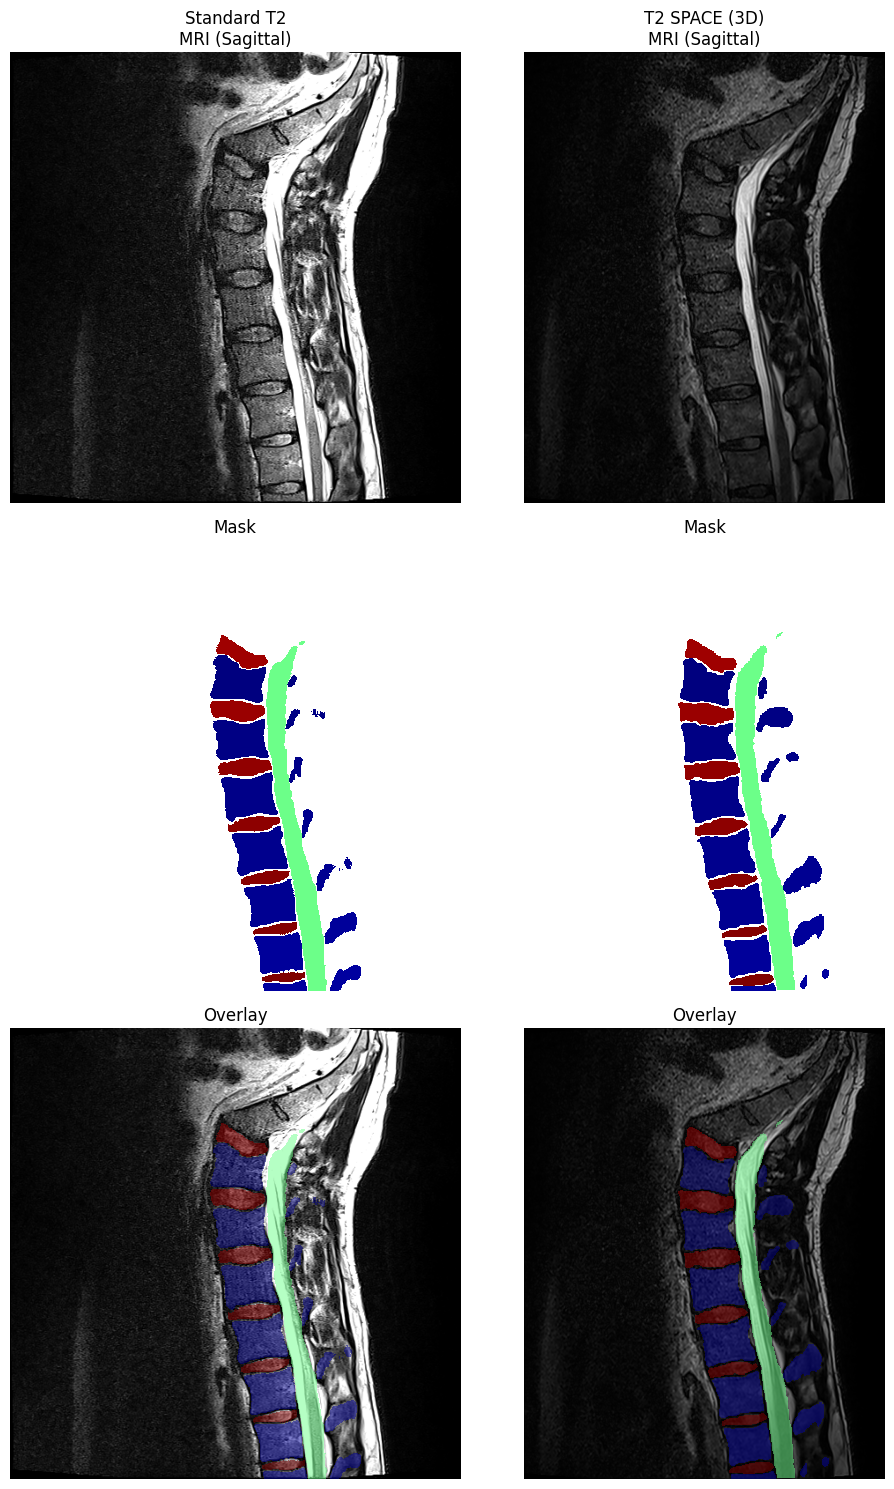

In [ ]:
FILE_PATHS = {
    "t2": {
        "img": 'SPIDER/images/images/5_t2.mha',
        "mask": 'SPIDER/masks/masks/5_t2.mha',
        "title": "Standard T2"
    },
    "space": {
        "img": 'SPIDER/images/images/5_t2_SPACE.mha',
        "mask": 'SPIDER/masks/masks/5_t2_SPACE.mha',
        "title": "T2 SPACE (3D)"
    }
}

def get_sagittal_slice(path, is_mask=False):

    try:
        image = sitk.ReadImage(path)
        
        orient_filter = sitk.DICOMOrientImageFilter()
        orient_filter.SetDesiredCoordinateOrientation("LPS")
        image = orient_filter.Execute(image)
        
        arr = sitk.GetArrayFromImage(image)
        
        mid_slice_idx = arr.shape[2] // 2
        sagittal_slice = arr[:, :, mid_slice_idx]
        
        return sagittal_slice
        
    except Exception as e:
        print(f"Error {os.path.basename(path)}: {e}")
        return None

data = []
keys = ["t2", "space"]

for k in keys:
    img_slice = get_sagittal_slice(FILE_PATHS[k]["img"])
    mask_slice = get_sagittal_slice(FILE_PATHS[k]["mask"], is_mask=True)
    data.append((img_slice, mask_slice, FILE_PATHS[k]["title"]))

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

rows_desc = ["MRI (Sagittal)", "Mask", "Overlay"]

for col_idx, (img, mask, title) in enumerate(data):
    if img is None or mask is None:
        continue
        
    ax1 = axes[0, col_idx]
    ax1.imshow(img, cmap='gray', aspect='equal')
    ax1.set_title(f"{title}\n{rows_desc[0]}")
    ax1.axis('off')
    
  
    ax2 = axes[1, col_idx]
    masked_data = np.ma.masked_where(mask == 0, mask)
    ax2.imshow(masked_data, cmap='jet', aspect='equal', interpolation='nearest')
    ax2.set_title(f"{rows_desc[1]}")
    ax2.axis('off')
    
    ax3 = axes[2, col_idx]
    ax3.imshow(img, cmap='gray', aspect='equal') 
    ax3.imshow(masked_data, cmap='jet', alpha=0.5, aspect='equal', interpolation='nearest') 
    ax3.set_title(f"{rows_desc[2]}")
    ax3.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# base_path = 'SPIDER'

# src_images_dir = os.path.join(base_path, 'images/images')
# src_masks_dir = os.path.join(base_path, 'masks/masks')

# dst_images_dir = os.path.join(base_path, 'images_cleaned')
# dst_masks_dir = os.path.join(base_path, 'masks_cleaned')

# def filter_and_copy_data():
#     if not os.path.exists(dst_images_dir):
#         os.makedirs(dst_images_dir)
#         print(f"Created directory: {dst_images_dir}")
    
#     if not os.path.exists(dst_masks_dir):
#         os.makedirs(dst_masks_dir)
#         print(f"Created directory: {dst_masks_dir}")

#     all_files = os.listdir(src_images_dir)
    
#     copied_count = 0
#     skipped_space = 0
#     skipped_other = 0

#     print("\nStarting filtering and copying process...")
#     print("-" * 50)

#     for filename in all_files:
#         if not filename.endswith('.mha'):
#             continue

#         if 't2' in filename and 'SPACE' not in filename:
#             src_img_path = os.path.join(src_images_dir, filename)
#             dst_img_path = os.path.join(dst_images_dir, filename)
            
#             src_mask_path = os.path.join(src_masks_dir, filename)
#             dst_mask_path = os.path.join(dst_masks_dir, filename)

#             if os.path.exists(src_mask_path):
#                 shutil.copy2(src_img_path, dst_img_path)
#                 shutil.copy2(src_mask_path, dst_mask_path)
#                 copied_count += 1
#             else:
#                 print(f"WARNING: Image {filename} found but mask is missing. Skipped.")
        
#         elif 'SPACE' in filename:
#             skipped_space += 1
#         else:
#             skipped_other += 1

#     print("-" * 50)
#     print("SUMMARY:")
#     print(f"Copied (T2 without SPACE): {copied_count}")
#     print(f"Skipped SPACE files: {skipped_space}")
#     print(f"Skipped other files: {skipped_other}")
#     print(f"\nFiles are located in:\n{dst_images_dir}\n{dst_masks_dir}")

# if __name__ == "__main__":
#     filter_and_copy_data()


Starting filtering and copying process...
--------------------------------------------------
--------------------------------------------------
SUMMARY:
Copied (T2 without SPACE): 210
Skipped SPACE files: 41
Skipped other files: 196

Files are located in:
SPIDER/images_cleaned
SPIDER/masks_cleaned


In [ ]:
# base_dir = 'SPIDER'

# src_img_dir = os.path.join(base_dir, 'images_cleaned')
# src_mask_dir = os.path.join(base_dir, 'masks_cleaned')

# output_img_dir = os.path.join(base_dir, 'Projekt/SPIDER_cleaned/images')
# output_mask_dir = os.path.join(base_dir, 'Projekt/SPIDER_cleaned/masks')

# for d in [output_img_dir, output_mask_dir]:
#     if not os.path.exists(d):
#         os.makedirs(d)
#         print(f"Created directory: {d}")

# def normalize_to_lps(input_path, output_path):
#     try:
#         image = sitk.ReadImage(input_path)
        
#         orient_filter = sitk.DICOMOrientImageFilter()
#         orient_filter.SetDesiredCoordinateOrientation("LPS")
#         fixed_image = orient_filter.Execute(image)
        
#         sitk.WriteImage(fixed_image, output_path, useCompression=True)
#         return True
#     except Exception as e:
#         print(f"Error processing {os.path.basename(input_path)}: {e}")
#         return False

# files = [f for f in os.listdir(src_img_dir) if f.endswith('.mha')]
# total = len(files)

# print(f"\nStarting processing for {total} files...")
# print("-" * 50)

# start_time = time.time()
# success_count = 0

# for i, filename in enumerate(files):
#     if 'SPACE' in filename:
#         continue

#     img_in = os.path.join(src_img_dir, filename)
#     mask_in = os.path.join(src_mask_dir, filename)
    
#     img_out = os.path.join(output_img_dir, filename)
#     mask_out = os.path.join(output_mask_dir, filename)
    
#     if normalize_to_lps(img_in, img_out):
#         if os.path.exists(mask_in):
#             normalize_to_lps(mask_in, mask_out)
#         else:
#             print(f"Warning: Mask missing for {filename}")
        
#         success_count += 1
    
#     if (i + 1) % 10 == 0:
#         print(f"Progress: {i + 1}/{total}")

# end_time = time.time()

# print("-" * 50)
# print("PROCESSING COMPLETE")
# print(f"Successfully processed: {success_count}/{total}")
# print(f"Time elapsed: {round(end_time - start_time, 2)} seconds")
# print(f"Final data location:\n{output_img_dir}\n{output_mask_dir}")

Created directory: /Users/leniecka/python/AIiID/Projekt/SPIDER_cleaned/images
Created directory: /Users/leniecka/python/AIiID/Projekt/SPIDER_cleaned/masks

Starting processing for 210 files...
--------------------------------------------------
Progress: 10/210
Progress: 20/210
Progress: 30/210
Progress: 40/210
Progress: 50/210
Progress: 60/210
Progress: 70/210
Progress: 80/210
Progress: 90/210
Progress: 100/210
Progress: 110/210
Progress: 120/210
Progress: 130/210
Progress: 140/210
Progress: 150/210
Progress: 160/210
Progress: 170/210
Progress: 180/210
Progress: 190/210
Progress: 200/210
Progress: 210/210
--------------------------------------------------
PROCESSING COMPLETE
Successfully processed: 210/210
Time elapsed: 20.26 seconds
Final data location:
/Users/leniecka/python/AIiID/Projekt/SPIDER_cleaned/images
/Users/leniecka/python/AIiID/Projekt/SPIDER_cleaned/masks


Processing 6 files from: SPIDER_cleaned


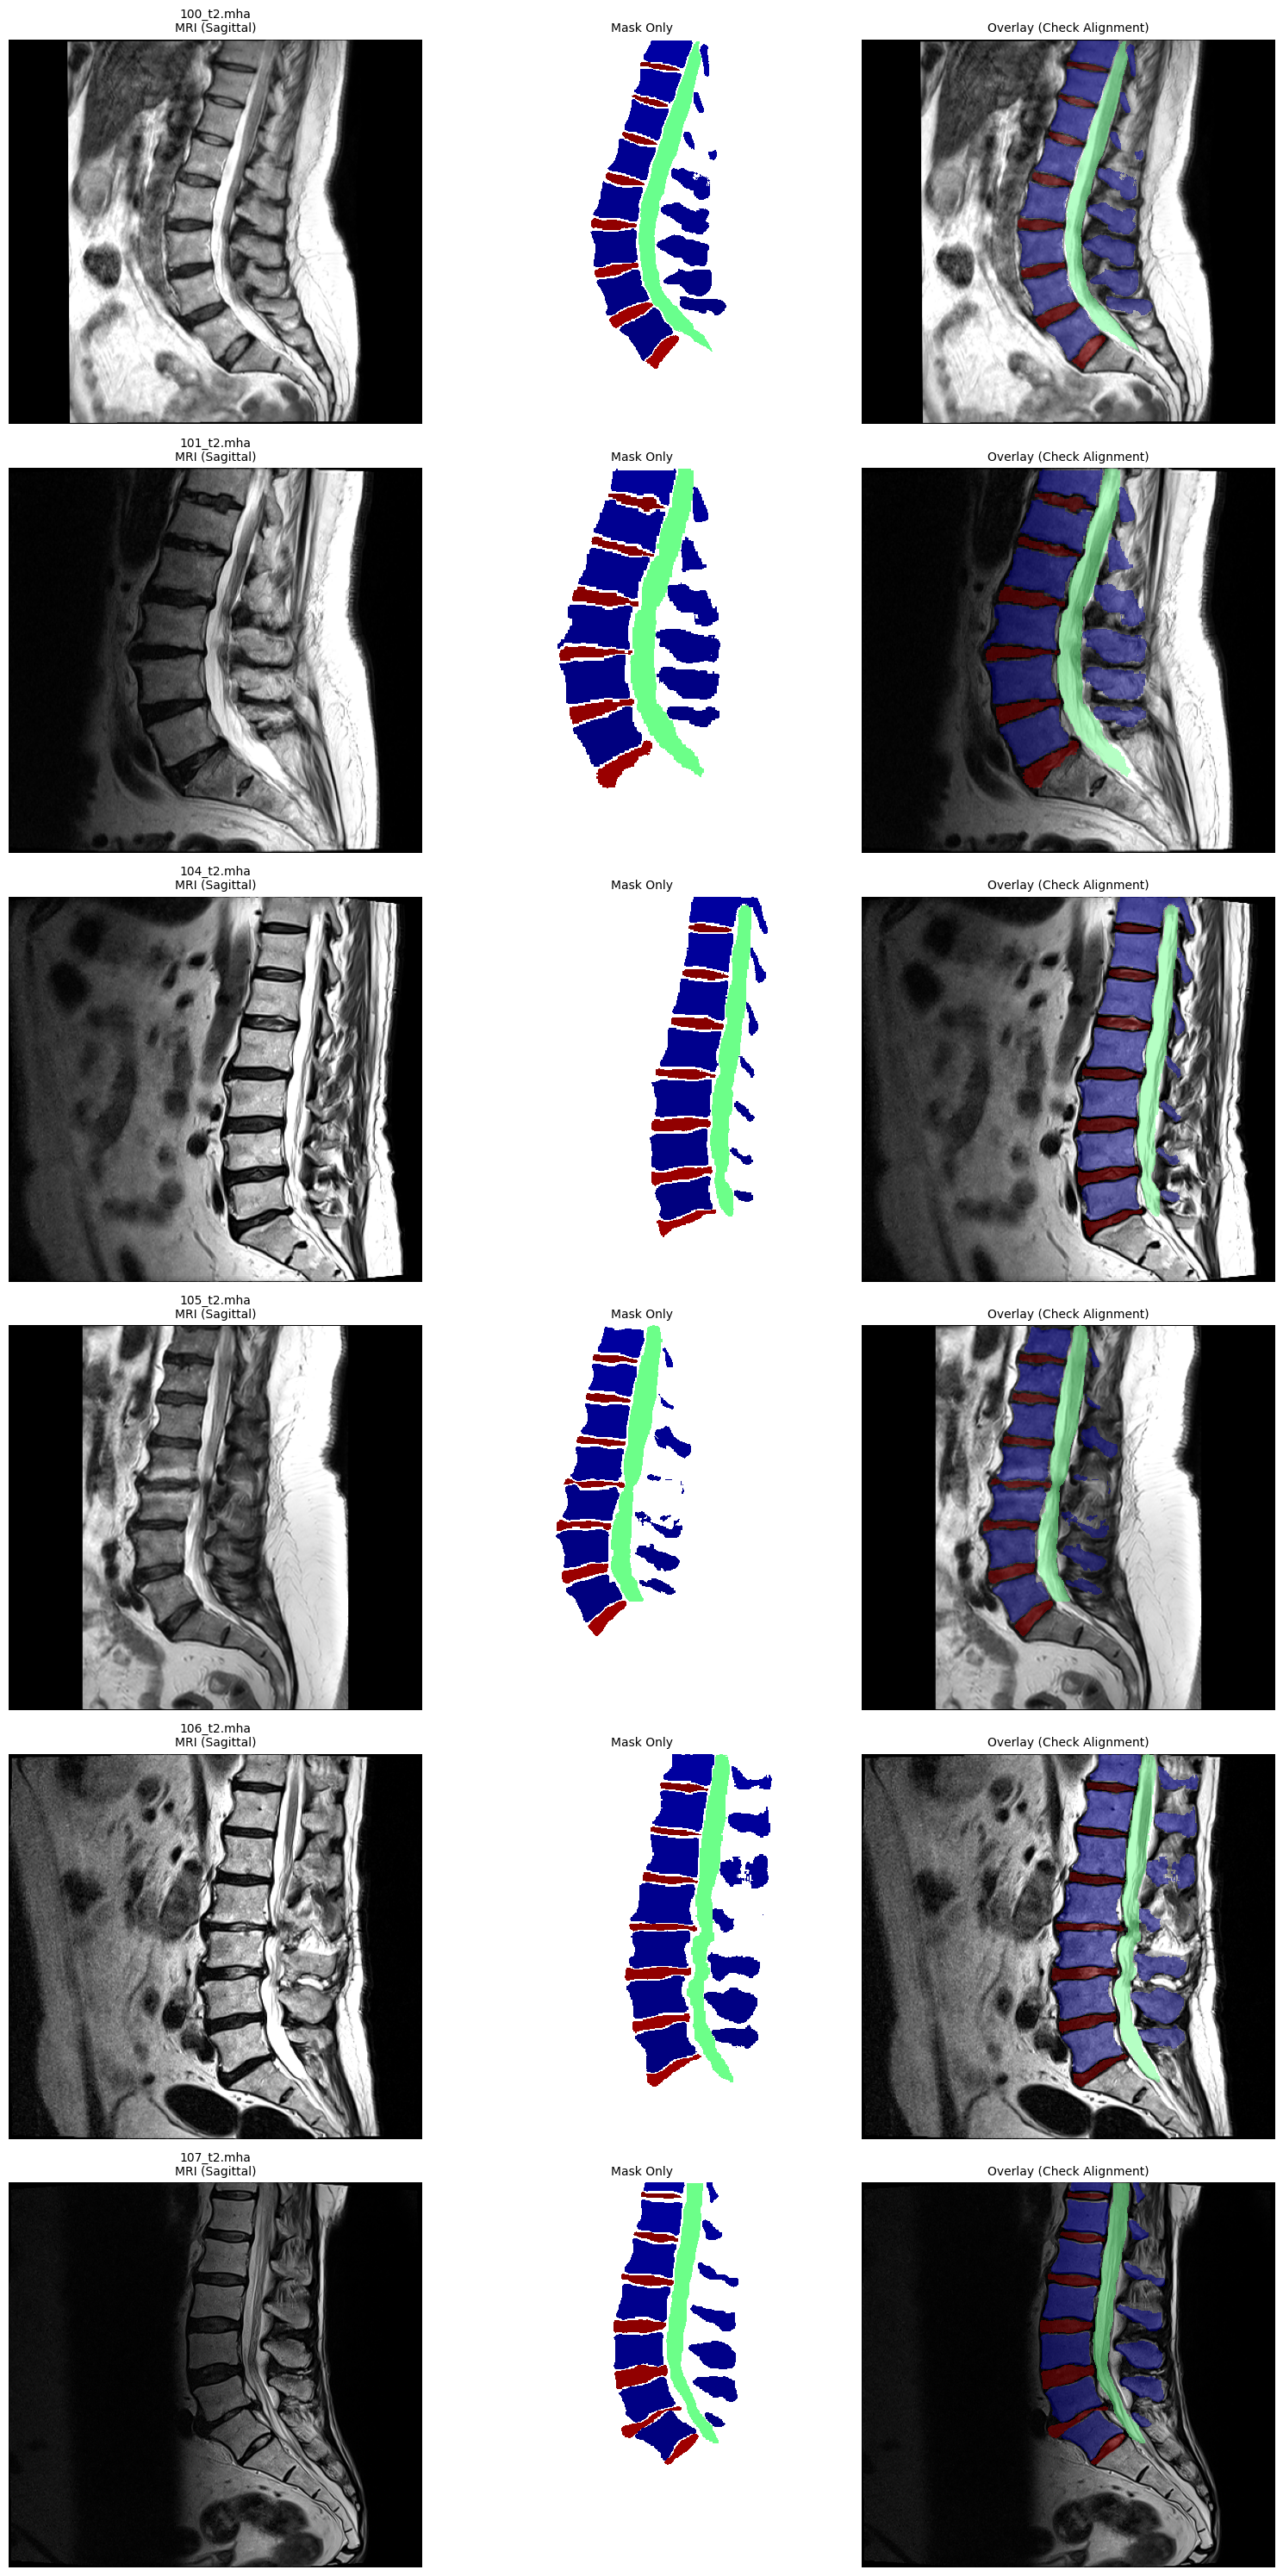

In [ ]:
base_dir = 'SPIDER_cleaned'
img_dir = os.path.join(base_dir, 'images')
mask_dir = os.path.join(base_dir, 'masks')

files = sorted([f for f in os.listdir(img_dir) if f.endswith('.mha')])[:6]

fig, axes = plt.subplots(len(files), 3, figsize=(15, 5 * len(files)))

print(f"Processing {len(files)} files from: {base_dir}")

for i, filename in enumerate(files):
    img_path = os.path.join(img_dir, filename)
    mask_path = os.path.join(mask_dir, filename)
    
    try:
        img = sitk.ReadImage(img_path)
        img_arr = sitk.GetArrayFromImage(img)
        
        if os.path.exists(mask_path):
            mask = sitk.ReadImage(mask_path)
            mask_arr = sitk.GetArrayFromImage(mask)
        else:
            print(f"Warning: Mask missing for {filename}")
            continue

        mid_x = img_arr.shape[2] // 2
        
        img_slice = img_arr[:, :, mid_x]
        mask_slice = mask_arr[:, :, mid_x]
        
        ax_mri = axes[i, 0]
        ax_mri.imshow(img_slice, cmap='gray', aspect='auto', origin='lower')
        ax_mri.set_title(f"{filename}\nMRI (Sagittal)", fontsize=10)
        ax_mri.axis('off')
        
        ax_mask = axes[i, 1]
        masked_data = np.ma.masked_where(mask_slice == 0, mask_slice)
        ax_mask.imshow(masked_data, cmap='jet', aspect='auto', origin='lower', interpolation='nearest')
        ax_mask.set_title("Mask Only", fontsize=10)
        ax_mask.axis('off')
        
        ax_over = axes[i, 2]
        ax_over.imshow(img_slice, cmap='gray', aspect='auto', origin='lower')
        ax_over.imshow(masked_data, cmap='jet', alpha=0.5, aspect='auto', origin='lower', interpolation='nearest')
        ax_over.set_title("Overlay (Check Alignment)", fontsize=10)
        ax_over.axis('off')
        
    except Exception as e:
        print(f"Error processing {filename}: {e}")

plt.tight_layout()
plt.show()